In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-delivery-time-prediction/Food_Delivery_Times.csv


## Import and Rename Data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("/kaggle/input/food-delivery-time-prediction/Food_Delivery_Times.csv")

In [4]:
dataset.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
dataset.drop("Order_ID",axis=1)

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...
995,8.50,Clear,High,Evening,Car,13,3.0,54
996,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [6]:
column_rename_map = {
    'Distance_I': 'Distance',
    'Traffic_Lev': 'Traffic_Level',
    'Vehicle_Ty': 'Vehicle_Type',
    'Preparatio': 'Preparation_Time',
    'Courier_Ex': 'Courier_Experience',
    'Delivery_Time_min': 'Delivery_Time_Minutes'
}


In [7]:
dataset=dataset.rename(columns=column_rename_map)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_Minutes   1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


## EDA

### Histograms/KDE Plots

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

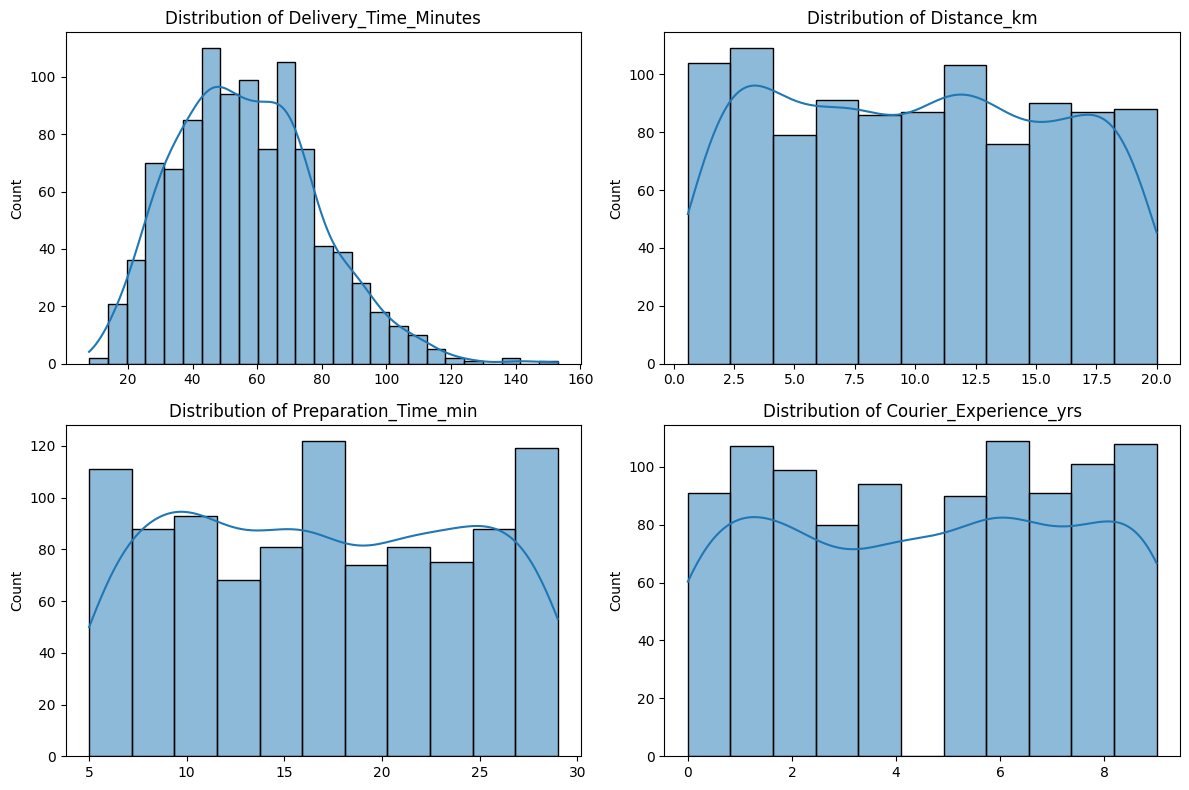

In [9]:
numeric_cols = ['Delivery_Time_Minutes', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
fig, axes=plt.subplots(nrows=2 , ncols=2 , figsize=(12, 8))
axes = axes.flatten()
for i , col in enumerate(numeric_cols):
    sns.histplot(data=dataset, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('') # Clear x-label for cleaner look, title is descriptive

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Scatter Plots

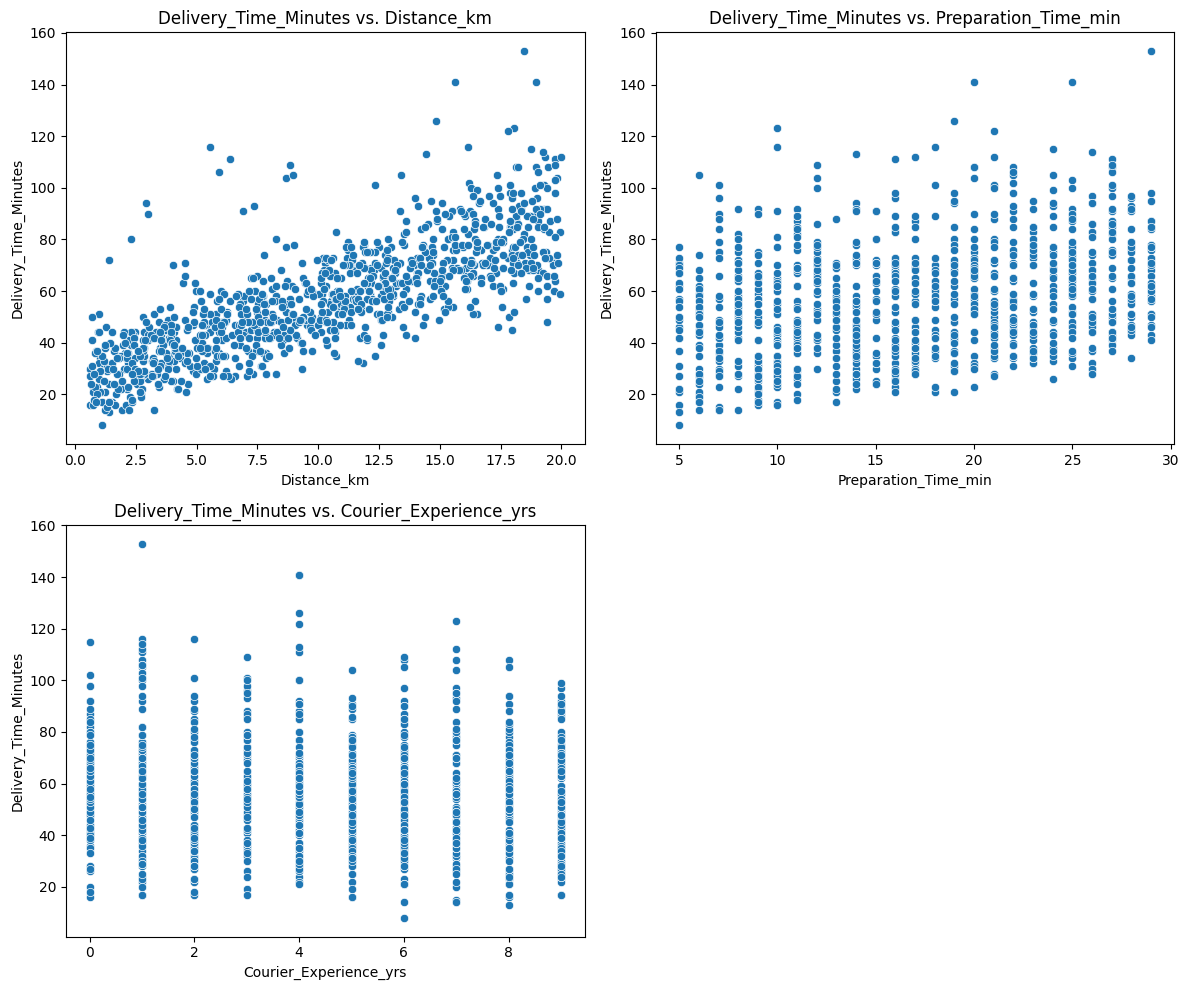

In [10]:
predictor_numeric_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
target_col = 'Delivery_Time_Minutes'

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(predictor_numeric_cols):
    sns.scatterplot(data=dataset, x=col, y=target_col, ax=axes[i])
    axes[i].set_title(f'{target_col} vs. {col}')
if len(predictor_numeric_cols) < len(axes):
    for j in range(len(predictor_numeric_cols), len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Count Plots

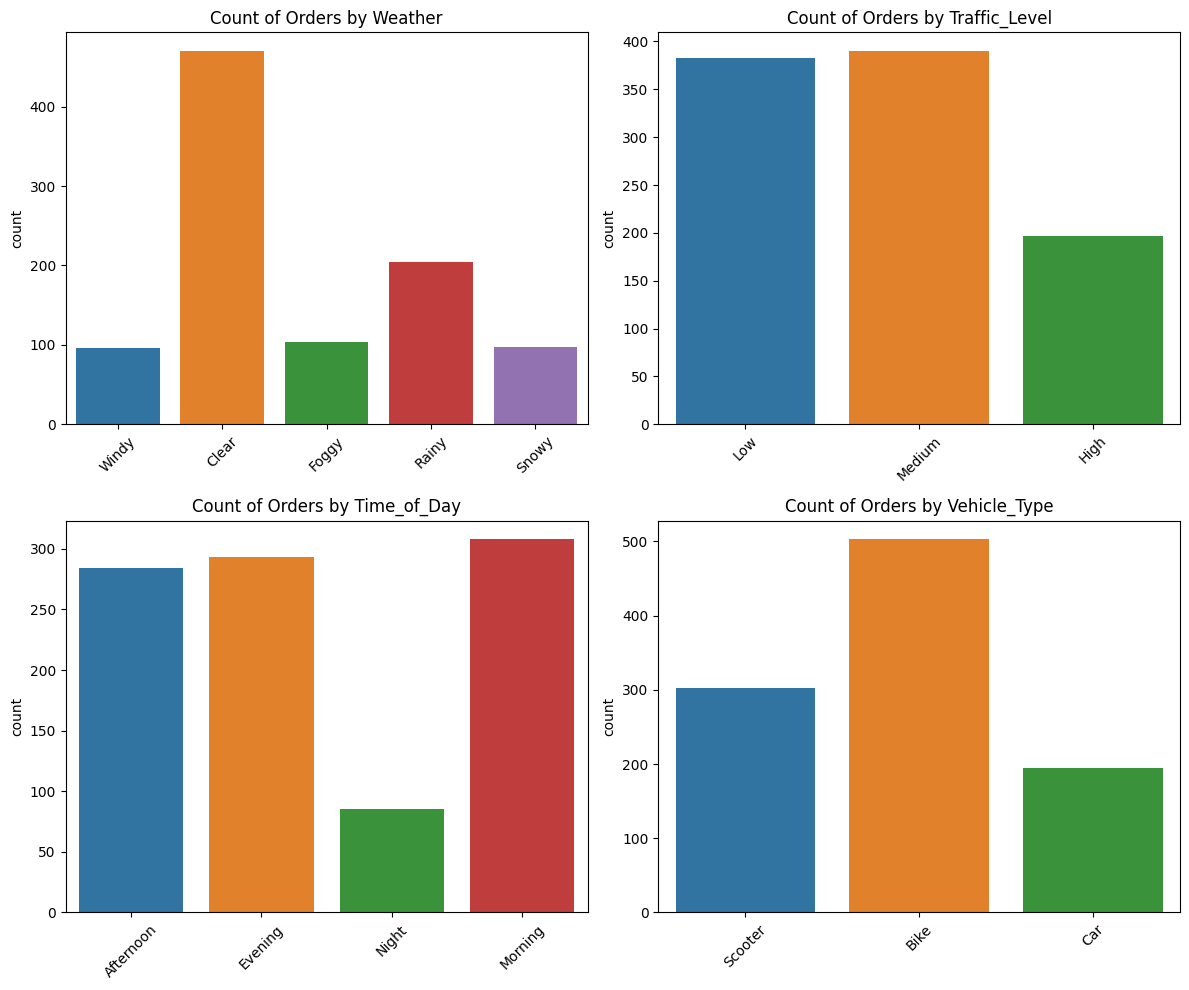

In [11]:
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_cols):
    order = None
    if col == 'Traffic_Level':
        order = ['Low', 'Medium', 'High']

    sns.countplot(data=dataset, x=col, ax=axes[i], order=order)
    axes[i].set_title(f'Count of Orders by {col}')
    axes[i].set_xlabel('') # Clear x-label
    # Rotate x-axis labels if they overlap (common for categories)
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

### Box Plots

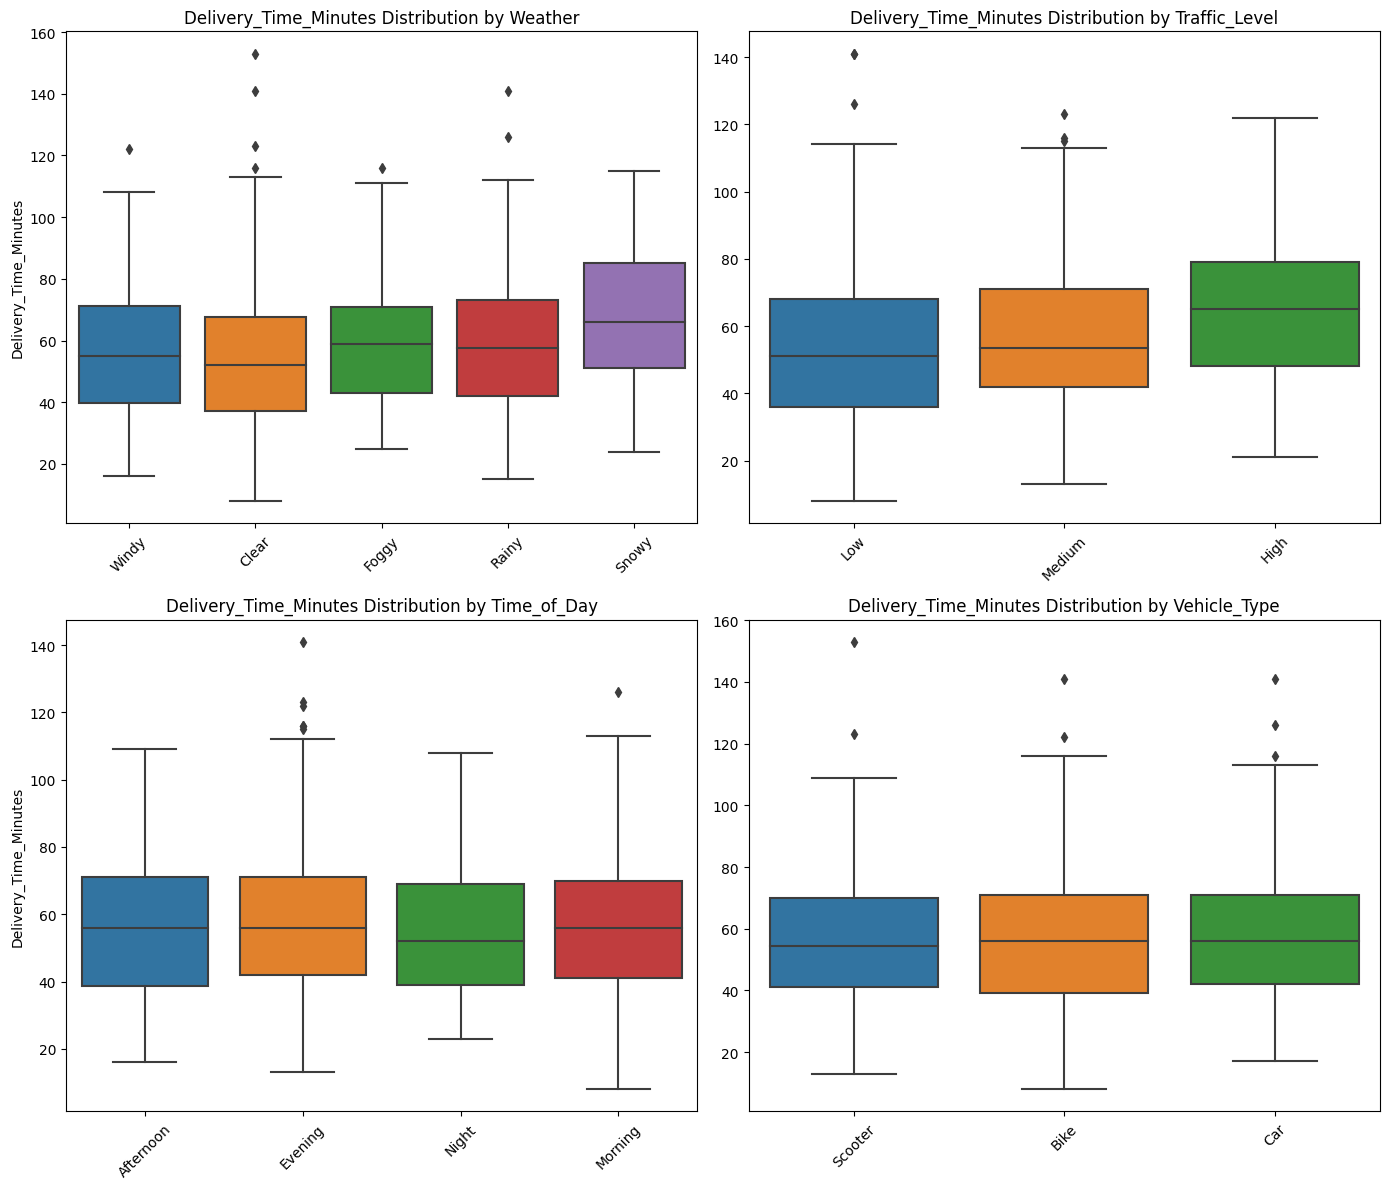

In [12]:
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
target_col = 'Delivery_Time_Minutes'

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12)) # May need slightly larger figure
axes = axes.flatten()

# Loop through categorical columns and plot box plots against the target
for i, col in enumerate(categorical_cols):
     # For Traffic_Level, let's apply a meaningful order if possible
    order = None
    if col == 'Traffic_Level':
        order = ['Low', 'Medium', 'High']

    sns.boxplot(data=dataset, x=col, y=target_col, ax=axes[i], order=order)
    axes[i].set_title(f'{target_col} Distribution by {col}')
    axes[i].set_xlabel('') # Clear x-label
    axes[i].set_ylabel(target_col if i % 2 == 0 else '') # Show y-label only on left plots
    # Rotate x-axis labels if they overlap
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Lineplot

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

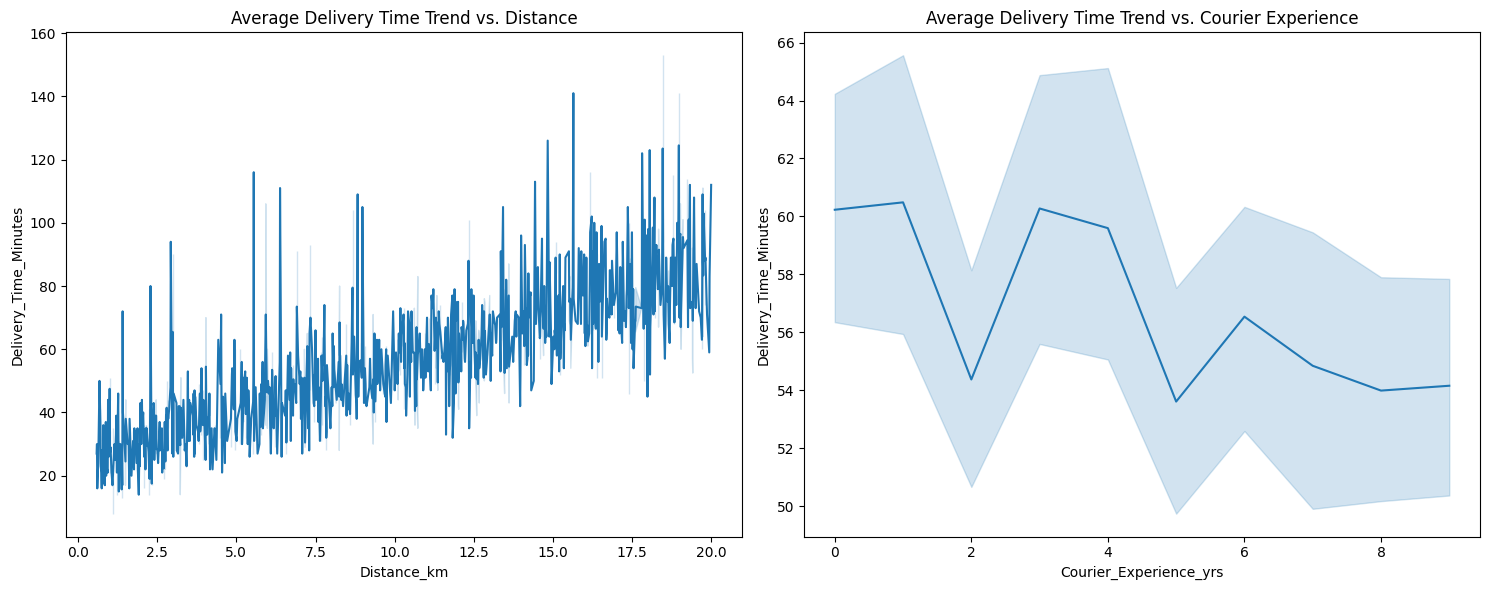

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6)) # 1 row, 2 columns

# Line plot for Delivery Time vs Distance
sns.lineplot(data=dataset, x='Distance_km', y='Delivery_Time_Minutes', ax=axes[0], errorbar=('ci', 95)) # ci=95 shows 95% confidence interval
axes[0].set_title('Average Delivery Time Trend vs. Distance')

# Line plot for Delivery Time vs Courier Experience
# Note: lineplot typically handles NaNs by aggregation, but be aware
sns.lineplot(data=dataset, x='Courier_Experience_yrs', y='Delivery_Time_Minutes', ax=axes[1], errorbar=('ci', 95))
axes[1].set_title('Average Delivery Time Trend vs. Courier Experience')

plt.tight_layout()
plt.show()

### Swarm Plot 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

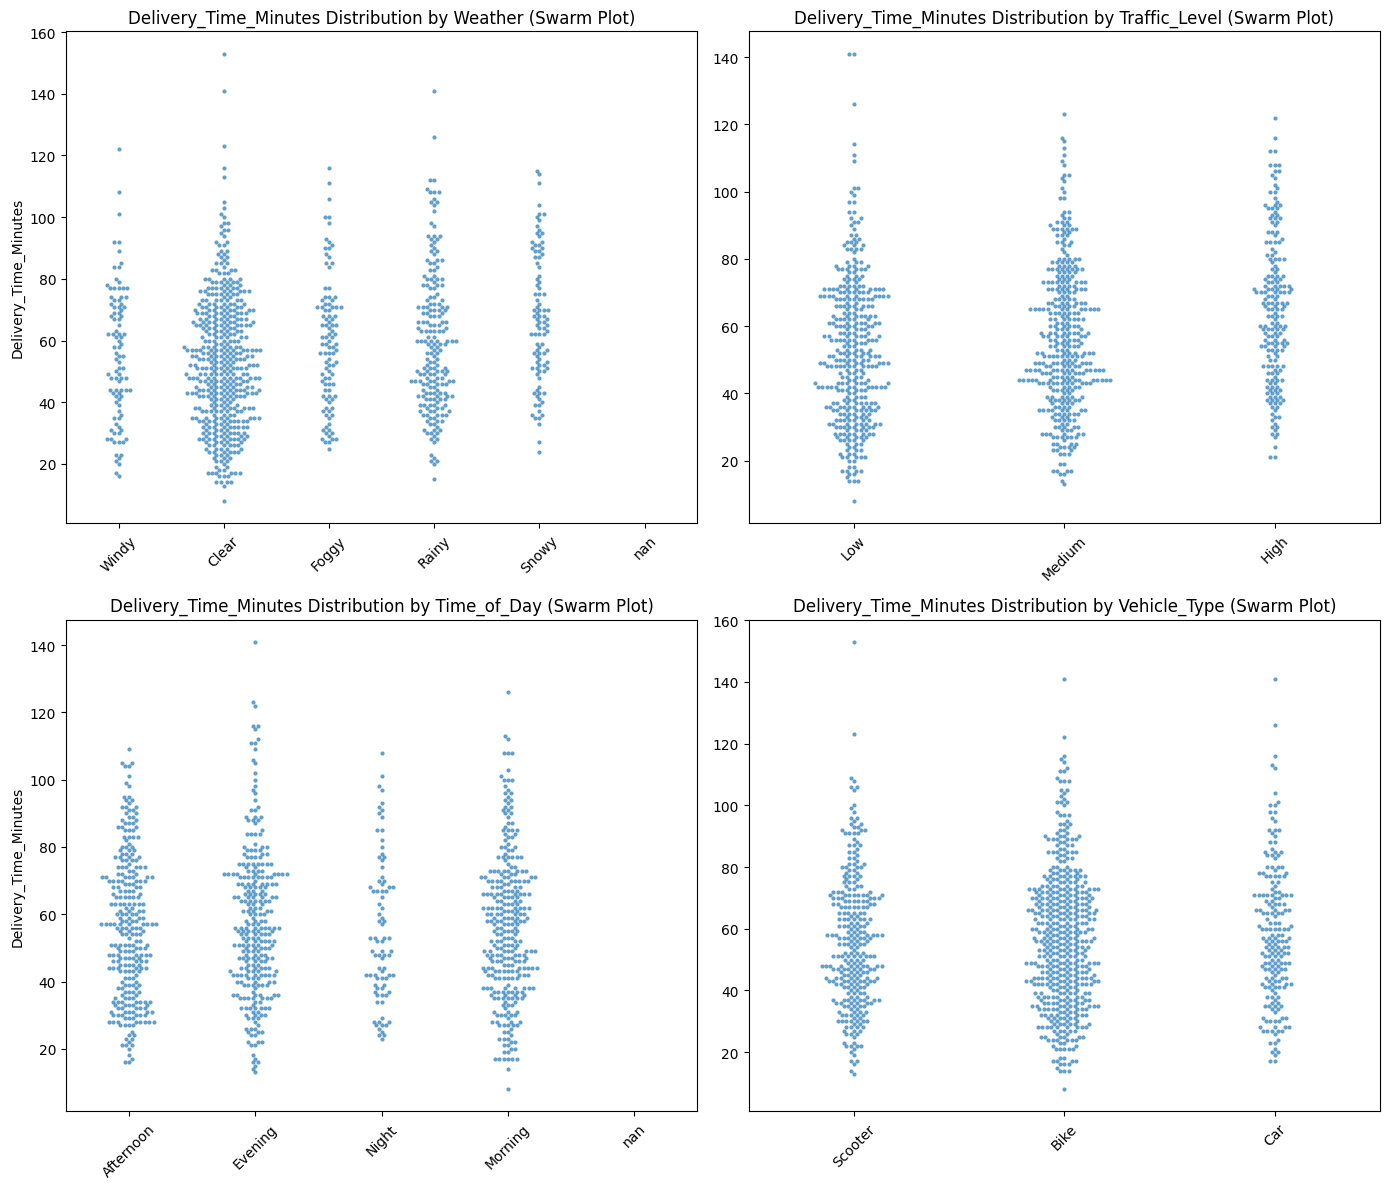

In [14]:

categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
target_col = 'Delivery_Time_Minutes'

# Create a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Loop through categorical columns and plot swarm plots
for i, col in enumerate(categorical_cols):
    order = None
    if col == 'Traffic_Level':
        order = ['Low', 'Medium', 'High']

    # Warning: Swarmplot can be slow on very large datasets
    sns.swarmplot(data=dataset, x=col, y=target_col, ax=axes[i], order=order, size=3, alpha=0.7) # Smaller size often better for swarm
    axes[i].set_title(f'{target_col} Distribution by {col} (Swarm Plot)')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(target_col if i % 2 == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Handle Missing Data

In [15]:
(dataset.isnull().sum()*100)/dataset.shape[0]

Order_ID                  0.0
Distance_km               0.0
Weather                   3.0
Traffic_Level             3.0
Time_of_Day               3.0
Vehicle_Type              0.0
Preparation_Time_min      0.0
Courier_Experience_yrs    3.0
Delivery_Time_Minutes     0.0
dtype: float64

- We could remove the rows but we did not did it for learning sake
- For missing data in numeric columns we did not do 'mean' because data is not gaussian 

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [17]:
def impute_missing_data(df):

    df_imputed = df.copy() # Create a copy to avoid modifying the original DataFrame

    # Separate categorical and numerical columns
    categorical_cols = df_imputed.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df_imputed.select_dtypes(include=['number']).columns

    # Impute categorical columns with the most frequent value
    if len(categorical_cols) > 0:
        imputer_categorical = SimpleImputer(strategy='most_frequent')
        df_imputed[categorical_cols] = imputer_categorical.fit_transform(df_imputed[categorical_cols])

    # Impute numerical columns using multivariate imputation (IterativeImputer)
    if len(numerical_cols) > 0:
        imputer_numerical = IterativeImputer(random_state=0)
        df_imputed[numerical_cols] = imputer_numerical.fit_transform(df_imputed[numerical_cols])


    return df_imputed

In [18]:
dataset_imputed = impute_missing_data(dataset)

In [19]:
dataset_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   float64
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   float64
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_Minutes   1000 non-null   float64
dtypes: float64(5), object(4)
memory usage: 70.4+ KB


## Outlier Removal

In [20]:
def remove_outliers_knn(df, numerical_cols, n_neighbors=5, contamination='auto'):
    """
    Removes outliers using K-Nearest Neighbors distance.
    Good for: Datasets where outliers are far from their neighbors.
    Note: This is a simplified KNN approach based on distance thresholding.
          LOF (below) is often preferred for neighbor-based outlier detection.
    """
    df_out = df.copy()
    if len(numerical_cols) > 0 and not df_out[numerical_cols].empty:
        # Calculate distances to k-th neighbor
        nn = NearestNeighbors(n_neighbors=n_neighbors + 1) # +1 because a point is its own neighbor
        nn.fit(df_out[numerical_cols])
        distances, indices = nn.kneighbors(df_out[numerical_cols])
        # Use distance to the k-th neighbor as the score (index k because indices are 0-based)
        kth_distances = distances[:, n_neighbors]
        # Define a threshold (e.g., based on percentile)
        threshold = np.percentile(kth_distances, 95) # Example: consider top 5% furthest as outliers
        # Identify outliers
        outlier_mask = kth_distances > threshold
        print(f"KNN: Found {sum(outlier_mask)} outliers based on distance to {n_neighbors}-th neighbor > {threshold:.2f}")
        df_out = df_out[~outlier_mask]
    return df_out

def remove_outliers_lof(df, numerical_cols, n_neighbors=20, contamination='auto'):
    """
    Removes outliers using Local Outlier Factor (LOF).
    Good for: Datasets with varying densities, identifies local outliers.
    """
    df_out = df.copy()
    if len(numerical_cols) > 0 and not df_out[numerical_cols].empty:
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        # Fit_predict returns -1 for outliers and 1 for inliers
        outlier_pred = lof.fit_predict(df_out[numerical_cols])
        outlier_mask = outlier_pred == -1
        print(f"LOF: Found {sum(outlier_mask)} outliers (contamination='{contamination}', n_neighbors={n_neighbors})")
        df_out = df_out[~outlier_mask]
    return df_out

def remove_outliers_isolation_forest(df, numerical_cols, contamination='auto', random_state=0):
    """
    Removes outliers using Isolation Forest.
    Good for: High-dimensional datasets. Efficient.
    """
    df_out = df.copy()
    if len(numerical_cols) > 0 and not df_out[numerical_cols].empty:
        iso_forest = IsolationForest(contamination=contamination, random_state=random_state)
        # Fit_predict returns -1 for outliers and 1 for inliers
        outlier_pred = iso_forest.fit_predict(df_out[numerical_cols])
        outlier_mask = outlier_pred == -1
        print(f"Isolation Forest: Found {sum(outlier_mask)} outliers (contamination='{contamination}')")
        df_out = df_out[~outlier_mask]
    return df_out

In [21]:
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.ensemble import IsolationForest

In [22]:
numerical_cols = dataset_imputed.select_dtypes(include=['number']).columns
df_after_knn = remove_outliers_knn(dataset_imputed.copy(), numerical_cols, n_neighbors=3)
print("\nDataFrame after KNN Outlier Removal:")
# print(df_after_knn) # Uncomment to see the full dataframe
print(f"Shape after KNN: {df_after_knn.shape}")

# Method 2: Local Outlier Factor (LOF)
# Using a copy of the imputed data for comparison
df_after_lof = remove_outliers_lof(dataset_imputed.copy(), numerical_cols, contamination=0.1) # Expect 10% outliers
print("\nDataFrame after LOF Outlier Removal:")
# print(df_after_lof) # Uncomment to see the full dataframe
print(f"Shape after LOF: {df_after_lof.shape}")

# Method 3: Isolation Forest
# Using a copy of the imputed data for comparison
df_after_iso = remove_outliers_isolation_forest(dataset_imputed.copy(), numerical_cols, contamination=0.1) # Expect 10% outliers
print("\nDataFrame after Isolation Forest Outlier Removal:")
# print(df_after_iso) # Uncomment to see the full dataframe
print(f"Shape after Isolation Forest: {df_after_iso.shape}")


KNN: Found 50 outliers based on distance to 3-th neighbor > 20.58

DataFrame after KNN Outlier Removal:
Shape after KNN: (950, 9)
LOF: Found 100 outliers (contamination='0.1', n_neighbors=20)

DataFrame after LOF Outlier Removal:
Shape after LOF: (900, 9)
Isolation Forest: Found 100 outliers (contamination='0.1')

DataFrame after Isolation Forest Outlier Removal:
Shape after Isolation Forest: (900, 9)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## Feature Scaling

In [23]:
df_after_iso

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_Minutes
0,522.0,7.93,Windy,Low,Afternoon,Scooter,12.0,1.0,43.0
1,738.0,16.42,Clear,Medium,Evening,Bike,20.0,2.0,84.0
2,741.0,9.52,Foggy,Low,Night,Scooter,28.0,1.0,59.0
3,661.0,7.44,Rainy,Medium,Afternoon,Scooter,5.0,1.0,37.0
4,412.0,19.03,Clear,Low,Morning,Bike,16.0,5.0,68.0
...,...,...,...,...,...,...,...,...,...
995,107.0,8.50,Clear,High,Evening,Car,13.0,3.0,54.0
996,271.0,16.28,Rainy,Low,Morning,Scooter,8.0,9.0,71.0
997,861.0,15.62,Snowy,High,Evening,Scooter,26.0,2.0,81.0
998,436.0,14.17,Clear,Low,Afternoon,Bike,8.0,0.0,55.0


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
def normalize_numerical_data(df, numerical_cols, target_col=None):
    df_normalized = df.copy()
    # Identify columns to scale (all numerical cols except the target col)
    cols_to_scale = [col for col in numerical_cols if col != target_col and col in df.columns]

    if len(cols_to_scale) > 0 and not df_normalized[cols_to_scale].empty:
        # Further filter to columns with variance > 0
        valid_cols_to_scale = [col for col in cols_to_scale if df_normalized[col].nunique() > 1]
        if valid_cols_to_scale:
            scaler = MinMaxScaler()
            num_col_names = df_normalized[valid_cols_to_scale].columns
            num_index = df_normalized[valid_cols_to_scale].index
            scaled_data = scaler.fit_transform(df_normalized[valid_cols_to_scale])
            df_normalized[valid_cols_to_scale] = pd.DataFrame(scaled_data, columns=num_col_names, index=num_index)
    return df_normalized

In [26]:
numerical_cols = df_after_iso.select_dtypes(include=['number']).columns

In [27]:
print(numerical_cols)

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_Minutes'],
      dtype='object')


In [28]:
df_after_iso.drop("Order_ID",axis=1)

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_Minutes
0,7.93,Windy,Low,Afternoon,Scooter,12.0,1.0,43.0
1,16.42,Clear,Medium,Evening,Bike,20.0,2.0,84.0
2,9.52,Foggy,Low,Night,Scooter,28.0,1.0,59.0
3,7.44,Rainy,Medium,Afternoon,Scooter,5.0,1.0,37.0
4,19.03,Clear,Low,Morning,Bike,16.0,5.0,68.0
...,...,...,...,...,...,...,...,...
995,8.50,Clear,High,Evening,Car,13.0,3.0,54.0
996,16.28,Rainy,Low,Morning,Scooter,8.0,9.0,71.0
997,15.62,Snowy,High,Evening,Scooter,26.0,2.0,81.0
998,14.17,Clear,Low,Afternoon,Bike,8.0,0.0,55.0


In [29]:
df_normalized=normalize_numerical_data(df_after_iso ,numeric_cols,target_col="Delivery_Time_Minutes")

In [30]:
df_normalized

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_Minutes
0,522.0,0.379007,Windy,Low,Afternoon,Scooter,0.291667,0.111111,43.0
1,738.0,0.817994,Clear,Medium,Evening,Bike,0.625000,0.222222,84.0
2,741.0,0.461220,Foggy,Low,Night,Scooter,0.958333,0.111111,59.0
3,661.0,0.353671,Rainy,Medium,Afternoon,Scooter,0.000000,0.111111,37.0
4,412.0,0.952947,Clear,Low,Morning,Bike,0.458333,0.555556,68.0
...,...,...,...,...,...,...,...,...,...
995,107.0,0.408480,Clear,High,Evening,Car,0.333333,0.333333,54.0
996,271.0,0.810755,Rainy,Low,Morning,Scooter,0.125000,1.000000,71.0
997,861.0,0.776629,Snowy,High,Evening,Scooter,0.875000,0.222222,81.0
998,436.0,0.701655,Clear,Low,Afternoon,Bike,0.125000,0.000000,55.0


## Feature Encoding


In [31]:
def encode_categorical_data(df, categorical_cols):
    df_encoded = df.copy()
    if len(categorical_cols) > 0:
        # Ensure columns actually exist in the dataframe before encoding
        valid_categorical_cols = [col for col in categorical_cols if col in df_encoded.columns]
        if valid_categorical_cols:
            df_encoded = pd.get_dummies(df_encoded, columns=valid_categorical_cols, drop_first=True, dummy_na=False,dtype=int)
    return df_encoded

In [32]:
 categorical_cols = df_normalized.select_dtypes(include=['object', 'category']).columns

In [33]:
df_normalized.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_Minutes
0,522.0,0.379007,Windy,Low,Afternoon,Scooter,0.291667,0.111111,43.0
1,738.0,0.817994,Clear,Medium,Evening,Bike,0.625000,0.222222,84.0
2,741.0,0.461220,Foggy,Low,Night,Scooter,0.958333,0.111111,59.0
3,661.0,0.353671,Rainy,Medium,Afternoon,Scooter,0.000000,0.111111,37.0
4,412.0,0.952947,Clear,Low,Morning,Bike,0.458333,0.555556,68.0


In [34]:
df = encode_categorical_data(df_normalized, categorical_cols)

In [35]:
df

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_Minutes,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522.0,0.379007,0.291667,0.111111,43.0,0,0,0,1,1,0,0,0,0,0,1
1,738.0,0.817994,0.625000,0.222222,84.0,0,0,0,0,0,1,1,0,0,0,0
2,741.0,0.461220,0.958333,0.111111,59.0,1,0,0,0,1,0,0,0,1,0,1
3,661.0,0.353671,0.000000,0.111111,37.0,0,1,0,0,0,1,0,0,0,0,1
4,412.0,0.952947,0.458333,0.555556,68.0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107.0,0.408480,0.333333,0.333333,54.0,0,0,0,0,0,0,1,0,0,1,0
996,271.0,0.810755,0.125000,1.000000,71.0,0,1,0,0,1,0,0,1,0,0,1
997,861.0,0.776629,0.875000,0.222222,81.0,0,0,1,0,0,0,1,0,0,0,1
998,436.0,0.701655,0.125000,0.000000,55.0,0,0,0,0,1,0,0,0,0,0,0


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(columns=["Delivery_Time_Minutes"])
y = df["Delivery_Time_Minutes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

- We cant apply linear regression as numeric column are not gaussian

## Decision Tree

In [38]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"MAE: {mae_dt:.4f}")
print(f"MSE: {mse_dt:.4f}")
print(f"R-squared: {r2_dt:.4f}")


MAE: 9.9333
MSE: 184.1556
R-squared: 0.4305


## Random Forest

In [39]:

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Use n_jobs=-1 for parallel processing
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")


MAE: 7.1072
MSE: 91.3553
R-squared: 0.7175


## Gradient Boosting

In [40]:
from sklearn.ensemble import  GradientBoostingRegressor


In [41]:
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MAE: {mae_gb:.4f}")
print(f"MSE: {mse_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")

MAE: 6.0940
MSE: 69.4497
R-squared: 0.7852


## Xgboost

In [42]:
import xgboost as xgb 

In [43]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', # Specify objective for regression
                                        n_estimators=100,
                                        learning_rate=0.1,
                                        max_depth=3,
                                        random_state=42,
                                        n_jobs=-1) # Use n_jobs for parallel processing
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print(f"R-squared: {r2_xgb:.4f}")



MAE: 6.0502
MSE: 69.4646
R-squared: 0.7852


## Hyper-parameeter tuning

In [44]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [45]:


# Define the objective function for Optuna
def objective(trial):
    # Suggest values for the hyperparameters
    # n_estimators: Number of boosting stages to perform.
    n_estimators = trial.suggest_int('n_estimators', 50, 300) # Increased upper limit slightly

    # max_depth: Maximum depth of the individual regression estimators.
    max_depth = trial.suggest_int('max_depth', 2, 10) # Adjusted range for typical GBRT

    # learning_rate: Shrinks the contribution of each tree.
    # A common range is 0.01 to 0.3
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)

    # min_samples_split: The minimum number of samples required to split an internal node.
    # Integer values, typically starting from 2.
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)

    # min_samples_leaf: The minimum number of samples required to be at a leaf node.
    # Integer values, typically starting from 1.
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # subsample: The fraction of samples to be used for fitting the individual base learners.
    # Values between 0.0 and 1.0. If less than 1.0, this results in Stochastic Gradient Boosting.
    # A common range is 0.5 to 1.0 (if 1.0, all samples are used).
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    # Create the GradientBoostingRegressor with suggested hyperparameters
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42  # For reproducibility
    )
    # Lower MSE is better, so higher negative MSE is better.
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()

    return score  # Return the negative mean squared error for Optuna to maximize

In [46]:


# Create an Optuna study
# We aim to maximize neg_mean_squared_error (which is equivalent to minimizing mean_squared_error)
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=50) # Increased n_trials for a more thorough search

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(study.best_params)
print(f"Best negative mean squared error: {study.best_value}")

# To get the actual best MSE (positive value)
print(f"Best mean squared error: {-study.best_value}")

# You can also access the best trial directly
# print("Best trial:")
# trial = study.best_trial
# print(f"  Value: {trial.value}")
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")


[I 2025-05-21 20:40:48,451] A new study created in memory with name: no-name-7bf5c88b-7b07-455b-8ef6-11805c9caa8a
[I 2025-05-21 20:40:49,537] Trial 0 finished with value: -90.08662416634047 and parameters: {'n_estimators': 246, 'max_depth': 7, 'learning_rate': 0.23835505257583262, 'min_samples_split': 20, 'min_samples_leaf': 8, 'subsample': 0.8083069974864155}. Best is trial 0 with value: -90.08662416634047.
[I 2025-05-21 20:40:50,504] Trial 1 finished with value: -81.52478767113378 and parameters: {'n_estimators': 286, 'max_depth': 6, 'learning_rate': 0.12627546817671192, 'min_samples_split': 2, 'min_samples_leaf': 20, 'subsample': 0.6511795114439647}. Best is trial 1 with value: -81.52478767113378.
[I 2025-05-21 20:40:51,174] Trial 2 finished with value: -84.01109268843447 and parameters: {'n_estimators': 124, 'max_depth': 8, 'learning_rate': 0.11232501540889157, 'min_samples_split': 3, 'min_samples_leaf': 10, 'subsample': 0.8915876811174113}. Best is trial 1 with value: -81.52478767

Best hyperparameters found:
{'n_estimators': 146, 'max_depth': 3, 'learning_rate': 0.08259459023109497, 'min_samples_split': 17, 'min_samples_leaf': 18, 'subsample': 0.815019368842773}
Best negative mean squared error: -72.32613904757764
Best mean squared error: 72.32613904757764


In [47]:

# Train a RandomForestClassifier using the best hyperparameters from Optuna
best_model = GradientBoostingRegressor(**study.best_trial.params, random_state=42)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print(f"R-squared: {r2_xgb:.4f}")

MAE: 6.1666
MSE: 72.6329
R-squared: 0.7754
